# **EDA_Analysis on Titanic Dataset**
# **By Amit Kharche**
**Follow me** on [Linkedin](https://www.linkedin.com/in/amit-kharche) and [Medium](https://medium.com/@amitkharche14) for more insights on **Data Science** and **AI**

---
# **Table of Contents**
---
**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - 3.1 [**Installing Libraries**](#Section31)<br>
  - 3.2 [**Upgrading Libraries**](#Section32)<br>
  - 3.3 [**Importing Libraries**](#Section33)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Pre-Processing**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
  - [**8.1 How is title associated with the sex of the passengers?**](#Section81)<br>
  - [**8.2 What is the relationship between age and the title of the passengers?**](#Section82)<br>
  - [**8.3 Does the title play an important role in the survival of the passengers?**](#Section83)<br>
  - [**8.4 Which gender category is more likely to survive, Male or Female?**](#Section84)<br>
  - [**8.5 What is the rate of survival among different classes of passengers?**](#Section85)<br>
  - [**8.6 What is the survival rate considering the Embarked variable?**](#Section86)<br>
  - [**8.7 Does the size of a family play an important role in the survival of passengers?**](#Section87)<br>
  - [**8.8 What is the survivability of passengers who are travelling alone?**](#Section88)<br>
  - [**8.9 How does Age play an important role for the survival of a passenger?**](#Section89)<br>
  - [**8.10 What is the relationship between Age, Sex and Survival features?**](#Section810)<br>
  - [**8.11 What is the rate of survival of males and females on the basis of Passenger Class?**](#Section811)<br>
  - [**8.12 What is the rate of survival of males and females on the basis of Port of Embarkment?**](#Section812)<br>
  - [**8.13 How do Pclass, Age, Sex, and Embarked collectively affect the survivability of the passengers?**](#Section813)<br>
  - [**8.14 How do Pclass, Embarked, and Sex influence the Survival of passengers.**](#Section814)<br>

**9.** [**Summarization**](#Section9)</br>
  - 9.1 [**Conclusion**](#Section91)</br>
  - 9.2 [**Actionable Insights**](#Section92)</br>

---
<a name = Section1></a>
# **1. Introduction**
---

- One of the most **popular disasters** in the history is the **sinking** of the RMS **Titanic**.

- RMS **Titanic** was a British passenger liner operated by the **White Star Line** that **sank** in the North Atlantic Ocean on 15 April 1912.

- The reason behind **sinking** of this beauty was because of **striking** to an **iceberg** while travelling from **Southampton** to **New York City**.

<center><img src="https://raw.githubusercontent.com/HirenRupchandani/Credit-Management-System/master/titanic_PNG1.png"></center>

- The popular event has **inspired** numerous **works of art**, the most prominient being the 1997 movie - Titanic.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- On **April 15, 1912** the **Titanic** **sank**, costing the lives of **1502 out of 2224** passengers and crew.

- Unfortunately, there **weren’t enough lifeboats** for everyone onboard, causing a **disproportionate** number of **deaths**.

- While there was some element of **luck** involved in surviving, it seems some **groups of people** were more likely to **survive** than others.

<center><img src="https://raw.githubusercontent.com/HirenRupchandani/Credit-Management-System/master/boat-sinking-2.gif"></center>


<a name = Section21></a>
### **Scenario**

- Let's say, after the accident, there is a need to implement **better regulations** for passenger liners.

- As a part of a data science team, you have been tasked with **analyzing the passenger data** of the RMS Titanic.

- You have been **provided** with the **data** that contains the information about the **passengers** aboarded the ship.

- The purpose is to **analyze** and **explore** **factors** that can influence a person’s **likelihood to survive**.

- So, the primary objectives are to:

  -	Do a statistical analysis of **how** some group of **people** were **survived** more than others.

  - Perform an Exploratory Data Analysis of titanic dataset with **visualizations** and **storytelling**.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [57]:
#!pip install -q datascience     # A package that is required by pandas-profiling library
#!pip install -q pandas-profiling # A library to generate basic statistics about data

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure **not to execute** the cell above (3.1) and below (3.2) again after restarting the runtime.

In [58]:
#!pip install -q --upgrade pandas-profiling
#!pip install ydata-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [59]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd     # Importing for panel data analysis
from ydata_profiling import ProfileReport # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None) # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None) # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)     # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None) # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                   # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                 # Importing pyplot interface of matplotlib
import seaborn as sns                           # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                      # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                    # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of the information about people boarding the famous RMS Titanic.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 891 | 12 | 58.9 KB |

| ID | Feature Name | Description of the feature |
| :-- | :--| :--|
|01| **PassengerId**   | Identity of the passenger                                    |
|02| **Survived**      | Whether the passenger survived or not                 |
|03| **Pclass**        | Class of the ticket holder                            |
|04| **Name**          | Name of the passenger                                 |
|05| **Sex**           | Sex of the passenger                                  |
|06| **Age**           | Age of the passenger                                  |
|07| **SibSp**     | Siblings and/or spouse travelling with passenger |
|08| **Parch**     | Parents and/or children travelling with passenger|
|09| **Ticket**        | Ticket number                                         |
|10| **Fare**          | Price of the ticket                                   |
|11| **Cabin**         | Cabin number                                          |
|12| **Embarked**     | Port of Embarkation                                   |

In [60]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/amitkharche/exploratory_data_analysis_projects_amit_kharche/refs/heads/main/EDA_titanic_dataset_amit_kharche/titanic_train.csv')
print('Shape of the dataset:', data.shape)
data.head()

Shape of the dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [61]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00000,891.00000,891.00000,714.00000,891.00000,891.00000,891.00000
mean,446.00000,0.38384,2.30864,29.69912,0.52301,0.38159,32.20421
std,257.35384,0.48659,0.83607,14.52650,1.10274,0.80606,49.69343
min,1.00000,0.00000,1.00000,0.42000,0.00000,0.00000,0.00000
25%,223.50000,0.00000,2.00000,20.12500,0.00000,0.00000,7.91040
50%,446.00000,0.00000,3.00000,28.00000,0.00000,0.00000,14.45420
75%,668.50000,1.00000,3.00000,38.00000,1.00000,0.00000,31.00000
max,891.00000,1.00000,3.00000,80.00000,8.00000,6.00000,512.32920


### **Observations:**

> **Survived**:
- More than 50% did not survive the accident.

> **Pclass**:
- There are a lot **more 3rd class** passengers than **1st and 2nd class**.
- We can also see that there are **more 2nd class** passengers **than 1st class** passengers.

> **SibSp**:
- More than **50%** of passengers are **not travelling** with their **siblings** or a **spouse**.
- There are **some** passengers who are travelling with as **maximum** as **8 siblings and spouse**.

> **Parch**:
- More than **75%** passengers are not travelling with a **parent** or **children**
- But there are some passengers who have a **maximum** number of **6 children** and/or **parents** with them on the ship.
- We observe that a vast majority of passengers **are not travelling** with their family members.

> **Age**:
- The **average age** of passengers is around **29 years** while the **minimum** and **maximum** ages are **0.4 years** and **80 years** respectively.
- There is some **missing** data in the **Age** feature.

> **Fare**:
- The **average price** of ticket seems to be **£32.2**. **Minimum** price of the ticket is recorded as **£0** and **maximum** price recorded as high as **£512.32**.
- More than **50%** of the passengers have paid atleast **£14**
- More than **75%** passengers have paid atleast **£7** for their ticket whereas **less than 25%** have paid for **more than £31**.
- We have to replace the minimum value in the **Fare** feature with a reasonable value.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Observations:**

- The **data types** of all the features look appropriate.

- There are **missing** values present in the **Age**, **Cabin** and **Embarked** features.

- **Age** and **Cabin** have a significant amount of **missing values** which **requires** **further investigation**.

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- For **quick analysis** pandas profiling is very handy.

- It generates profile reports from a pandas DataFrame.

- For each feature **statistics** are presented in an interactive HTML report.

In [63]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Pre_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 860.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


### **Observations:**

- There are **891** observations with **12** features. Most of the features have **categorical** data.

- Only **342** passengers out of **891** survived the accident.

- **Name**, **Ticket**, and **Cabin** features have high cardinality and are uniformly distributed.

- **PassengerId** is uniformly distributed

- A lot of **zeros** are present in **Fare**, **Sibsp** and **Parch** features.

- There are **no duplicate** rows in the dataset.

- We can observe that **8.1%** of data in cells is **missing**.

- **Fare** feature is highly skewed towards right.

- **Age** feature is faily symmetrical.

- We can observe that the **Age** feature has **177 missing values** and **Cabin** feature has **687 missing values**.

- **Embarked** feature has just **2 missing values**.

- For detailed information, check the **Pre Profiling Report.html** file.

---
<a name = Section6></a>
# **6. Data Cleaning**
---

- We will perform **cleaning** operations on our data based on the observations made from the profiling report.

|Feature|Data Type|Missing Proportion|Solution|
|:--:|:--:|:--:|:--|
|Age|float64|19.9%|Replace with median.|
|Embarked|object|0.2%|Replace with mode.|
|Cabin|object|77.1%|Drop the feature.|

In [64]:
# Filling the missing values of Embarked feature with the mode of the feature.
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].mode()[0])

# Filling the missing values of Age feature with the median age.
data['Age'].fillna(value=data['Age'].median(), inplace=True)

# Dropping the Cabin feature
data.drop(labels='Cabin', axis=1, inplace=True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.28330,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,S


- We have successfully **cleaned** our data.

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- Now that we have cleansed the data, the dataset does not contain missing values.

- So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights.

In [65]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Post_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 1768.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


### **Observations:**

- You can compare the two reports, i.e **Pre Profiling Report.html** and **Post Profiling Report.html**.

- Observations in Post Profiling Report.html:

  - In the Dataset info, **Total Missing** = **0.0%**

  - Number of **features** = **11**

  - You can see the difference in the **Age** feature in both the reports.

  - A lot of zeros are present in **Sibsp** and **Parch** features. They won't be removed as they are necessary.

  - We can observe that **Pclass** and **Fare** are highly **correlated** to each other **inversely**.

  - A lot of **inverse correlations** are observed among the features.

  - For detailed information, check the **Post Profiling Report.html** file.

- We can now begin the Exploratory Data Analysis.

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---
**NOTE**:  

- Before diving further, we will **create** some **new features** that will be useful for analyzing the data.

- These features will be **FamilySize** and **Title**.

- The **FamilySize** will describe the frequency of family members.

- The **Title** will describe salutation of the passenger.

In [66]:
# Creating a new feature FamilySize from Sibsp and Parch
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Creating Title feature from Name
data['Title'] = data['Name'].str.extract(pat=' ([A-Za-z]+)\.', expand=False)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.28330,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,S,1,Mr


<a name = Section81></a>
# **8.1 How is title associated with the sex of the passengers?**

In [67]:
# Creating a crosstab between Sex and Title
pd.crosstab(index=data['Sex'], columns=data['Title'])

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- There are **a lot of titles** for passengers. We will **simplify** these into selected categories.

- We will arrange the Males and Females into Mr, Mrs, Master, and Miss and put the **neutral** titles as **Other**

In [68]:
# Rearranging titles into common titles
data['Title'].replace(to_replace=['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
                                  'Rev', 'Capt', 'Sir', 'Don'],
                      value=['Miss', 'Miss', 'Miss', 'Other', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other',
                             'Mr', 'Mr', 'Mr'],
                      inplace=True)

- Let's now check again for **Title** and **Sex** features.

In [69]:
# Creating a crosstab between Sex and Title again
pd.crosstab(index=data['Sex'], columns=data['Title'])

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,127,1
male,40,0,522,0,15


- We can see that **gender** and **titles** **match** with each other (**Mr** and **Master** for **males**, **Miss** and **Mrs** for **females**)

- We can use this feature to check if a **title** of a person played an important role in their **survival**.

<a name = Section82></a>
# **8.2 What is the relationship between age and the title of the passengers?**

We will use standard definitions for titles according to Google and Wikipedia:

- **Mr** denotes an **adult man** (Age>18) (regardless of marital status)

- **Mrs** denotes an **adult woman** (Age>18) who is **married**.

- **Master** is an English honorific for **boys** and **young** men.

- **Miss** is an English language honorific used only for an **unmarried** **woman**.

- We will now **visualize** and **compare** the various titles based on this **standard**.

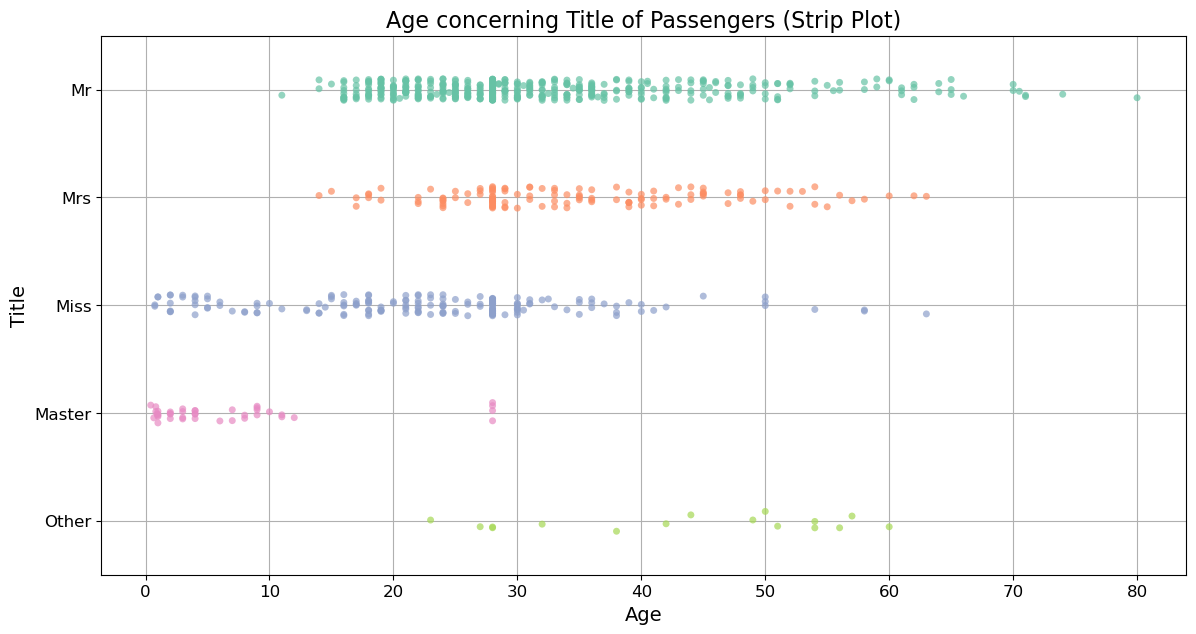

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot a stripplot as an alternative to catplot
sns.stripplot(x="Age", y="Title", data=data, jitter=True, size=5, palette="Set2", alpha=0.7)

# Add cosmetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Age', size=14)
plt.ylabel('Title', size=14)
plt.title('Age concerning Title of Passengers (Strip Plot)', size=16)
plt.grid(True)

# Display the plot
plt.show()


### **Observations**:

- **Titles** of passengers **don't match** the standard considered by us.

- This is because there are some **Masters** with **age** around **25 years** and **Misters** as young as **10 years** old.

- **Mrs** can be debated based on the **age** of the female gender.

- Some **males** and **females** (**Age<18**) can have marital status as **married** that explains their title as Mr and Mrs but such **data** is **not available** to us.

<a name = Section83></a>
# **8.3 Does the title play an important role in the survival of the passengers?**

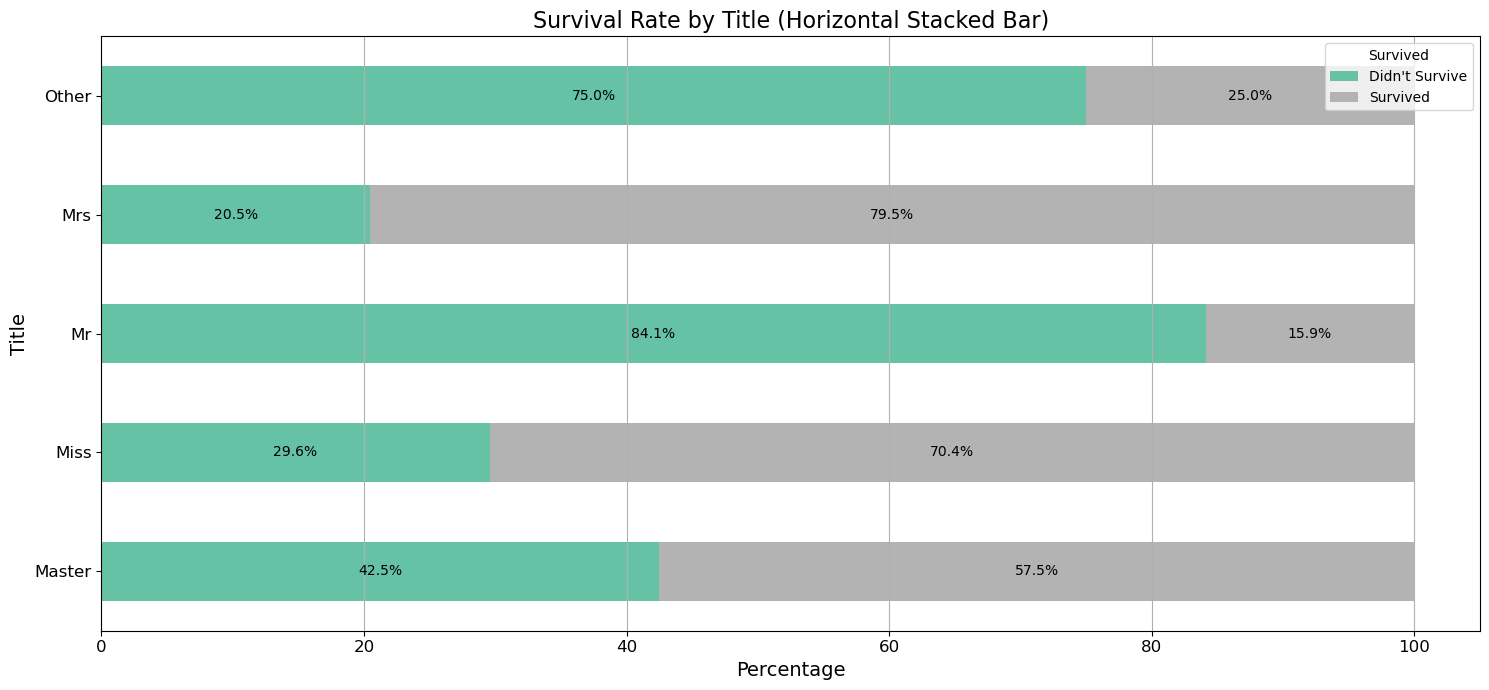

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab of Title vs Survived
title_survived = pd.crosstab(data['Title'], data['Survived'])

# Normalize by row to show percentage
title_survived_pct = title_survived.div(title_survived.sum(axis=1), axis=0) * 100

# Plot a horizontal stacked bar chart
ax = title_survived_pct.plot(kind='barh', stacked=True, figsize=(15, 7), colormap='Set2')

# Add percentage annotations
for i, (index, row) in enumerate(title_survived_pct.iterrows()):
    left = 0
    for val in row:
        ax.text(left + val / 2, i, f'{val:.1f}%', va='center', ha='center', fontsize=10)
        left += val

# Add plot cosmetics
plt.xlabel('Percentage', size=14)
plt.ylabel('Title', size=14)
plt.title('Survival Rate by Title (Horizontal Stacked Bar)', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(True, axis='x')
plt.legend(["Didn't Survive", 'Survived'], title='Survived')
plt.tight_layout()

# Show the plot
plt.show()


### **Observations**:

- **Mrs** and **Miss** have particularly **higher** **survival** rate as compared to the rest of the titles.

- We can see that the passengers with the title "**Mr**" **died** the **most**.

- There are rarely any passengers with the **Other** title. We can't conclude if they were given more priority during the rescue.

<a name = Section84></a>
# **8.4 Which gender category is more likely to survive, Male or Female?**

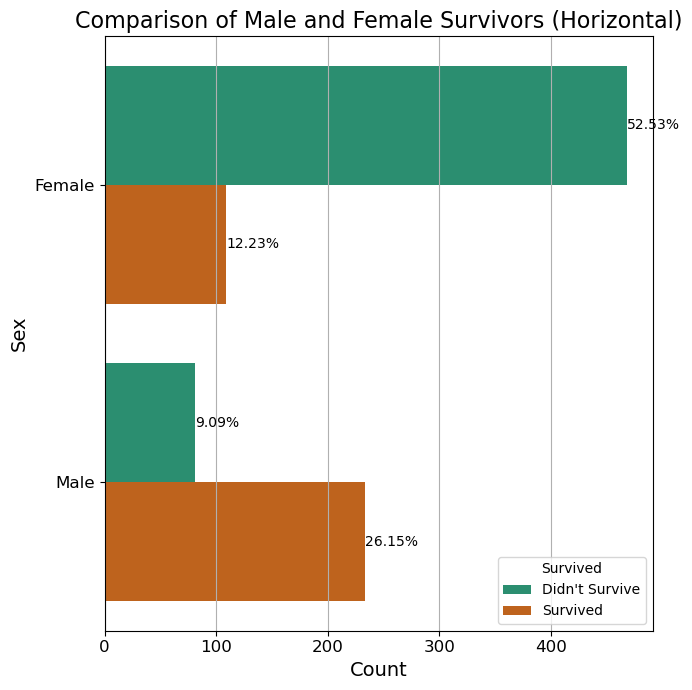

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure
fig = plt.figure(figsize=(7, 7))

# Horizontal countplot (Sex on y-axis)
ax = sns.countplot(y='Sex', hue='Survived', data=data, palette='Dark2')

# Calculate total passengers
total = data.shape[0]

# Add percentage annotations to bars
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), va='center')

# Customize the plot
plt.yticks(ticks=[0, 1], labels=["Female", "Male"], fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Sex', fontsize=14)
plt.title('Comparison of Male and Female Survivors (Horizontal)', fontsize=16)
plt.legend(labels=["Didn't Survive", "Survived"], title='Survived')
plt.grid(True, axis='x')

# Show the plot
plt.tight_layout()
plt.show()


### **Observations**:

- We can observe that a **significant** number of **males**  **didn't survive** the accident (**468/577 males died**).

- On contrary, the **female** **survival** rate is noticibly **higher** than the males (Only **81/314 females died**).


<a name = Section85></a>
# **8.5 What is the rate of survival among different classes of passengers?**

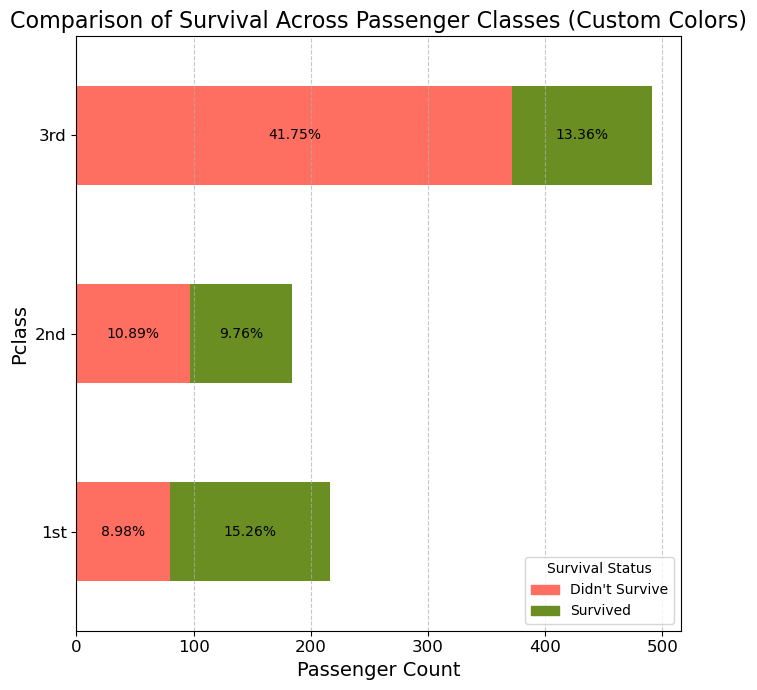

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab for Pclass vs Survived
pclass_survived = pd.crosstab(data['Pclass'], data['Survived'])

# Get total passengers
total = data.shape[0]

# Define custom colors: [Survived=0, Survived=1]
custom_colors = ['#FF6F61', '#6B8E23']  # Coral Red and Olive Green

# Plot the stacked horizontal bar chart
ax = pclass_survived.plot(
    kind='barh',
    stacked=True,
    figsize=(7, 7),
    color=custom_colors
)

# Add percentage annotations
for i, (index, row) in enumerate(pclass_survived.iterrows()):
    left = 0
    for val in row:
        percent = f'{(val / total) * 100:.2f}%'
        ax.text(left + val / 2, i, percent, va='center', ha='center', fontsize=10)
        left += val

# Add titles and axis labels
plt.xlabel('Passenger Count', fontsize=14)
plt.ylabel('Pclass', fontsize=14)
plt.title('Comparison of Survival Across Passenger Classes (Custom Colors)', fontsize=16)

# Custom tick labels
plt.yticks(ticks=[0, 1, 2], labels=["1st", "2nd", "3rd"], fontsize=12)
plt.xticks(fontsize=12)

# Custom legend
custom_labels = ['Didn\'t Survive', 'Survived']
custom_patches = [plt.Rectangle((0, 0), 1, 1, color=c) for c in custom_colors]
plt.legend(custom_patches, custom_labels, title='Survival Status')

# Grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **Observations**:

- **Majority** of passengers are from **3rd** class.

- A significant amount of **3rd** class passengers **did not survive** during the shipwreck.

- This creates a concern that **3rd** class passengers were given **less** **priority** to the rescue than the rest of the passengers.

- Passengers from the **1st** **class** have the **highest** **survival rate** than the **2nd class** than the **3rd class** passengers.

<a name = Section86></a>
# **8.6 What is the survival rate considering the Embarked variable?**

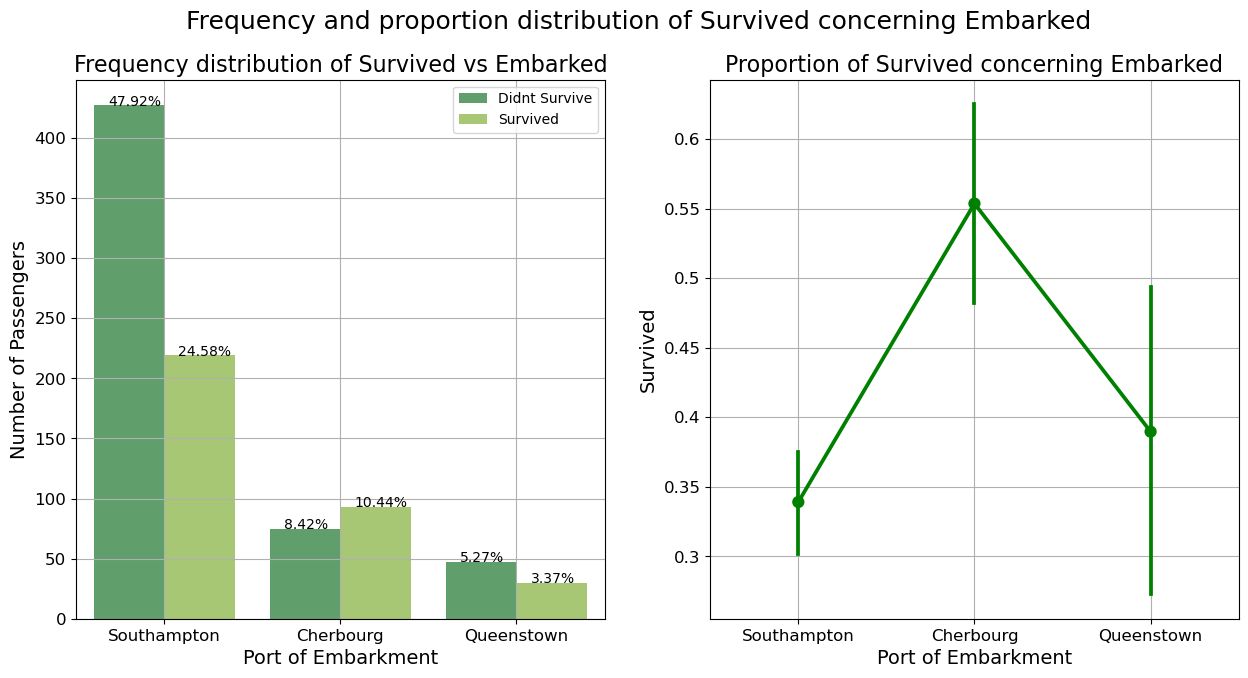

In [74]:
# Entering port names in a list - ports.
ports = ["Southampton", "Cherbourg", "Queenstown"]

# Instantiate a figure of size of 15 x 7 inches with 2 subplots.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

# Plotting a countplot of embarked concerning survival in the first subplot.
sns.countplot(x='Embarked', data=data, hue='Survived', palette='summer', ax=ax[0])

# Adding percentages to the bars.
for p in ax[0].patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax[0].annotate(percentage, (x, y))

# Adding some cosmetics - ticks, labels, title, legend and grid to the countplot.
ax[0].set_title(label='Frequency distribution of Survived vs Embarked', size=16)
ax[0].set_ylabel(ylabel='Number of Passengers', size=14)
ax[0].set_xlabel(xlabel='Port of Embarkment', size=14)
ax[0].set_xticklabels(labels=ports, fontsize=12)
ax[0].set_yticklabels(labels=np.arange(0,500,50), fontsize=12)
ax[0].legend(labels=["Didnt Survive", 'Survived'])
ax[0].grid(True)

# CPlotting a pointplot of embarked concerning survival in the second subplot.
sns.pointplot(x='Embarked', y='Survived', data=data, color='green', ax=ax[1])

# Adding some cosmetics - ticks, labels, title, and grid to the pointplot.
ax[1].set_title(label='Proportion of Survived concerning Embarked', size=16)
ax[1].set_ylabel(ylabel='Survived', size=14)
ax[1].set_xlabel(xlabel='Port of Embarkment', size=14)
ax[1].set_xticklabels(labels=ports, fontsize=12)
ax[1].set_yticklabels(labels=np.round(np.arange(0.25,0.7,0.05),2), fontsize=12)
ax[1].grid(True)

# Setting a super title for Surival vs Embarked
plt.suptitle(t='Frequency and proportion distribution of Survived concerning Embarked', size=18)

# Display the output
plt.show()

### **Observations**:

- From the left graph, we can observe that maximum number of people have boarded from **Southampton** port.

- Considering passengers from **Cherbourg**, more people **survived** than died, but this is not the case with **Queenstown**.

- On the right graph, we observe that the chances of **survival** for passengers boarding from Port **Cherbourg** is **highest** at around **55%** while it is **lowest** for **Southampton** just **below 35%**.

<a name = Section87></a>
# **8.7 Does the size of a family play an important role in the survival of passengers?**

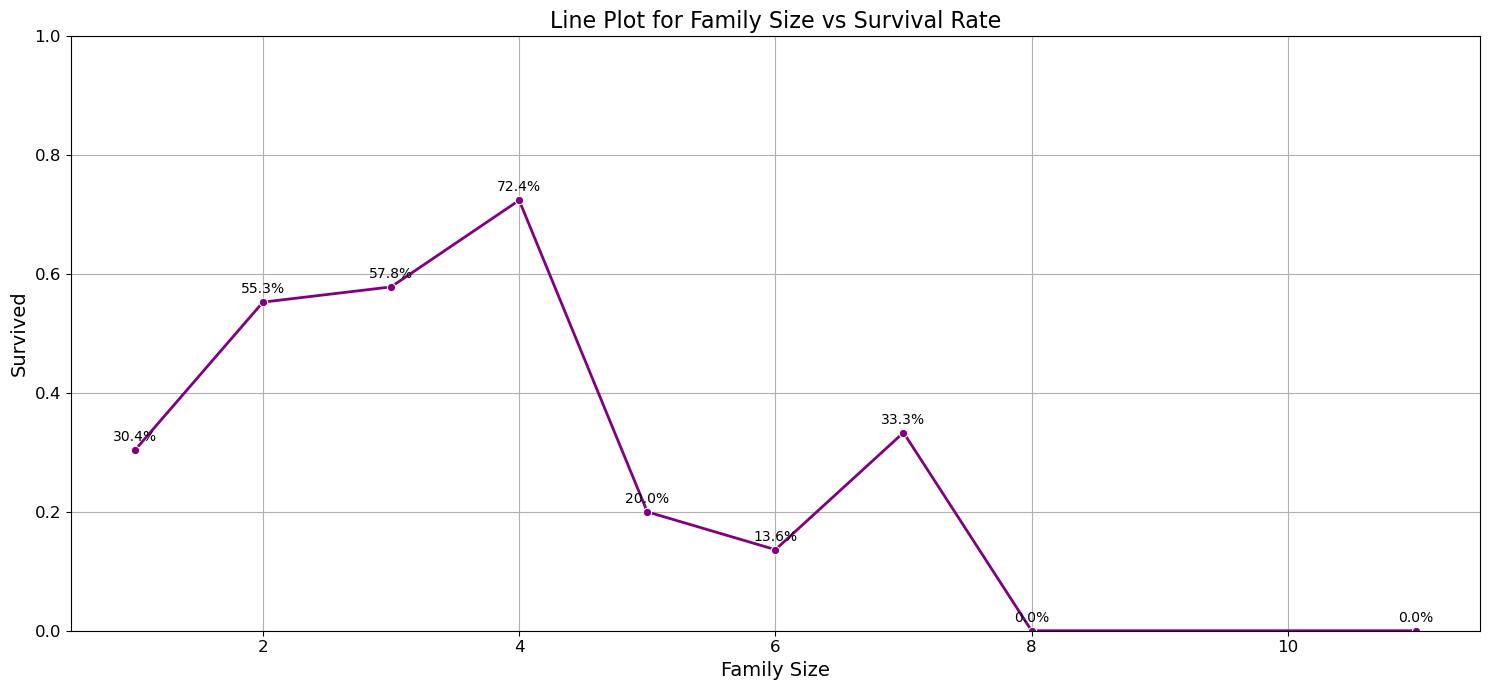

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Simulate data if not already present
# data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Calculate average survival rate for each family size
family_survival = data.groupby('FamilySize')['Survived'].mean().reset_index()

# Instantiate figure
plt.figure(figsize=(15, 7))

# Line plot with markers for trend visualization
sns.lineplot(x='FamilySize', y='Survived', data=family_survival, marker='o', color='purple', linewidth=2)

# Annotate each point with percentage
for i, row in family_survival.iterrows():
    plt.text(row['FamilySize'], row['Survived'] + 0.015, f"{row['Survived']*100:.1f}%", ha='center', fontsize=10)

# Add plot cosmetics
plt.title('Line Plot for Family Size vs Survival Rate', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Survived', fontsize=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylim(0, 1)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


### **Observations**:

- As **FamilySize** **increases**, **survivability** **decreases**.

- This indicates that **all** the family members of passengers **could not** be **saved**.

- We can see that a lot of people who were **alone** aboard have **died**.

<a name = Section88></a>
# **8.8 What is the survivability of passengers who are travelling alone?**

In [76]:
# Instantiate a new column IsAlone with zeros
data['IsAlone'] = 0

# If FamilySize=1, then the passenger "is alone"
data.loc[data['FamilySize']==1, 'IsAlone'] = 1

# Checking the contents of the new column in the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.28330,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,S,1,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,S,1,Mr,1


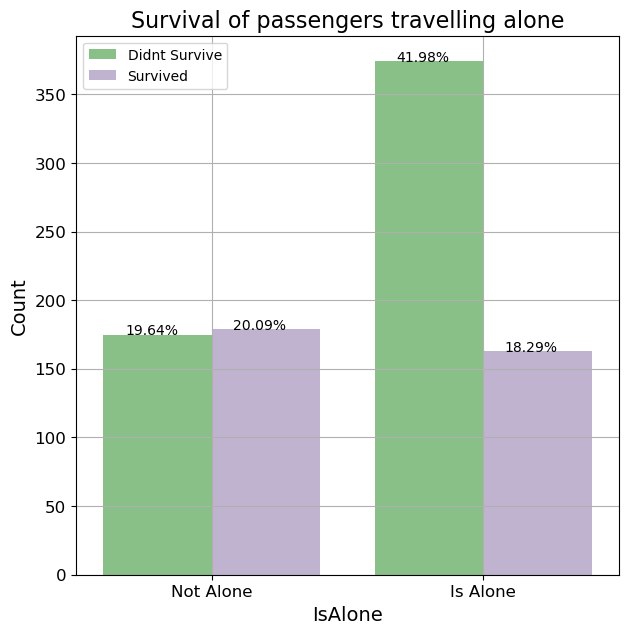

In [77]:
# Instantiate a figure of size of 7 x 7 inches
fig = plt.figure(figsize=(7, 7))

# Creating countplot of IsAlone vs survived
ax = sns.countplot(x='IsAlone', hue='Survived', data=data, palette='Accent')

# Adding percentages to the bars
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

# Adding some cosmetics - ticks, labels, title, legend and grid.
plt.xticks(ticks=[0, 1], labels=['Not Alone', 'Is Alone'], size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='IsAlone', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Survival of passengers travelling alone', size=16)
plt.legend(labels=["Didnt Survive", 'Survived'])
plt.grid(True)

# Display the figure
plt.show()

### **Observations**:

- A **large number** of passengers were travelling **alone** on the ship.

- **Majority** of people who were **alone** did not survive.

- Passengers with **atleast 1** family member had almost **equal** chances of **survival** or **death** as compared to those who were alone.


<a name = Section89></a>
# **8.9 How does Age play an important role for the survival of a passenger?**

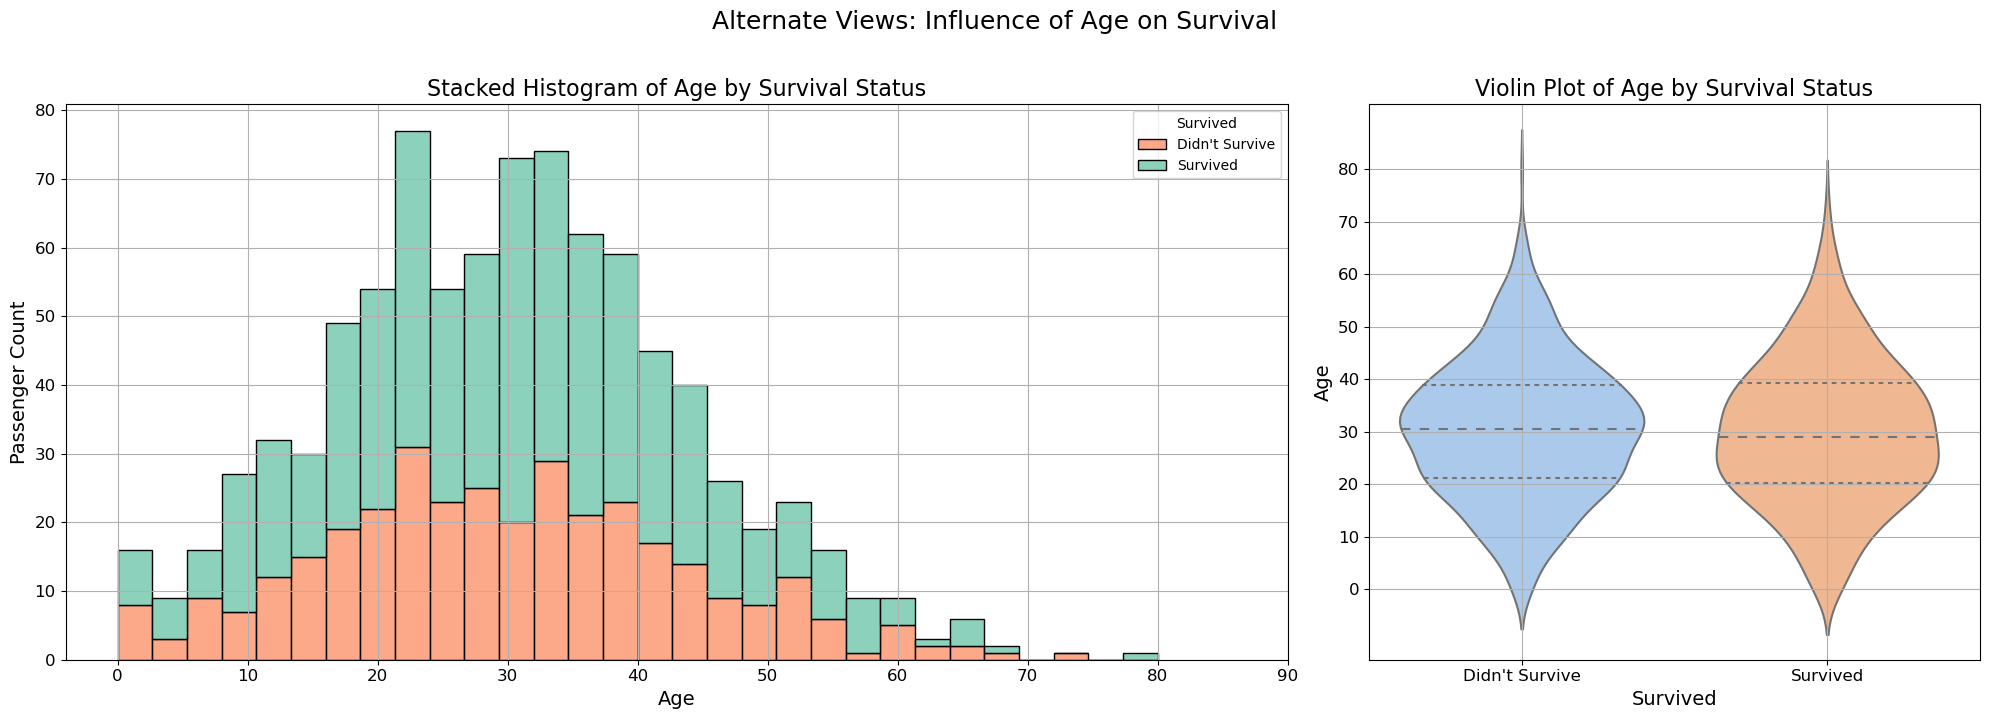

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create synthetic Titanic-like data (if not already loaded)
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.normal(loc=30, scale=14, size=891).clip(0, 80),
    'Survived': np.random.choice([0, 1], size=891, p=[0.62, 0.38])
})

# Set up a figure with 2:1 width ratio for subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), gridspec_kw={'width_ratios': [2, 1]})

# === Left Plot: Stacked Histogram (alternative to KDE) ===
sns.histplot(data=data, x='Age', hue='Survived', bins=30, multiple='stack', palette='Set2', ax=ax[0])

# Add labels and cosmetics
ax[0].set_title('Stacked Histogram of Age by Survival Status', fontsize=16)
ax[0].set_xlabel('Age', fontsize=14)
ax[0].set_ylabel('Passenger Count', fontsize=14)
ax[0].set_xticks(np.arange(0, 100, 10))
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend(title='Survived', labels=["Didn't Survive", "Survived"])
ax[0].grid(True)

# === Right Plot: Violin Plot (alternative to Boxplot) ===
sns.violinplot(x='Survived', y='Age', data=data, palette='pastel', inner='quartile', ax=ax[1])

# Add labels and cosmetics
ax[1].set_title('Violin Plot of Age by Survival Status', fontsize=16)
ax[1].set_xlabel('Survived', fontsize=14)
ax[1].set_ylabel('Age', fontsize=14)
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Didn't Survive", "Survived"], fontsize=12)
ax[1].set_yticks(np.arange(0, 90, 10))
ax[1].tick_params(axis='y', labelsize=12)
ax[1].grid(True)

# Super title
plt.suptitle('Alternate Views: Influence of Age on Survival', fontsize=18, y=1.02)

# Display the plots
plt.tight_layout()
plt.show()


### **Observations**:

- From the left graph, we can see that a lot of **senior citizens** (Age>60) died in the **accident**.

- From both the graphs, we observe that the loss of children with **Age less than 10** is not in significant amount.

- From the right graph, we see that the **eldest** and the **youngest** person on the journey **survived** the shipwreck.

- From both the graphs, we observe that **majority** of **victims** were from the **20-40 years** age group.

<a name = Section810></a>
# **8.10 What is the relationship between Age, Sex and Survival features?**

- Age is a **continous** feature. We will create a new feature **Age_band** by creating bins from the **Age** feature.

In [79]:
# We will perform binning to form age bands
for i in range(8, 0, -1):
    data.loc[data['Age'] <= i*10, 'Age_band'] = i

# Checking the number of passenegers in each band
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
4.000000,250
3.000000,232
2.000000,152
5.000000,122
6.000000,61
1.000000,57
7.000000,15
8.000000,2


In [80]:
data.head()

,Age,Survived,Age_band
0,36.95400,1,4.00000
1,28.06430,1,3.00000
2,39.06764,0,4.00000
3,51.32242,1,6.00000
4,26.72185,0,3.00000


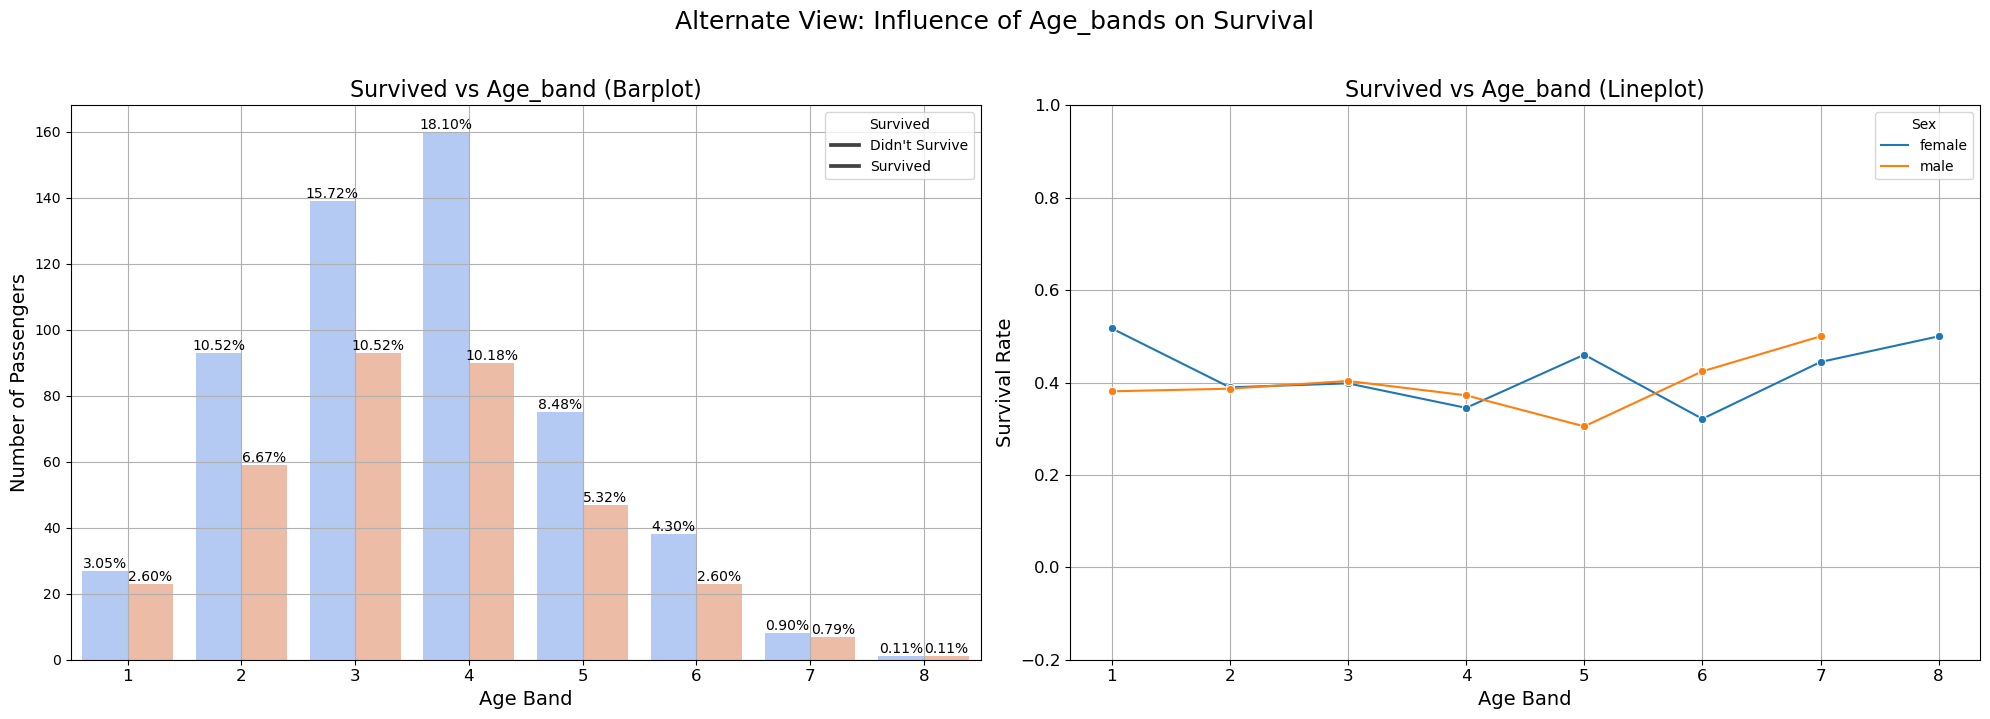

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate synthetic Titanic-like data
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.normal(loc=30, scale=14, size=891).clip(0, 80),
    'Survived': np.random.choice([0, 1], size=891, p=[0.62, 0.38]),
    'Sex': np.random.choice(['male', 'female'], size=891)
})

# 2. Create Age_band column (categorical binning)
data['Age_band'] = pd.cut(
    data['Age'], 
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
    labels=[1, 2, 3, 4, 5, 6, 7, 8]
)

# Drop rows where Age_band is NaN (if any)
data = data.dropna(subset=['Age_band'])
data['Age_band'] = data['Age_band'].astype(int)

# 3. Define total passengers for percentage calc
total = len(data)
age_bands_set = [1, 2, 3, 4, 5, 6, 7, 8]

# 4. Create figure with 2 subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# === LEFT PLOT: Barplot ===
grouped = data.groupby(['Age_band', 'Survived']).size().reset_index(name='Count')
sns.barplot(x='Age_band', y='Count', hue='Survived', data=grouped, palette='coolwarm', ax=ax[0])

# Add percentage labels
for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f'{(height / total) * 100:.2f}%', 
                   (p.get_x() + p.get_width() / 2, height), 
                   ha='center', va='bottom', fontsize=10)

# Customize barplot
ax[0].set_title('Survived vs Age_band (Barplot)', fontsize=16)
ax[0].set_xlabel('Age Band', fontsize=14)
ax[0].set_ylabel('Number of Passengers', fontsize=14)
ax[0].set_xticks(np.arange(len(age_bands_set)))
ax[0].set_xticklabels(age_bands_set, fontsize=12)
ax[0].legend(labels=["Didn't Survive", "Survived"], title='Survived')
ax[0].grid(True)

# === RIGHT PLOT: Lineplot ===
line_data = data.groupby(['Age_band', 'Sex'])['Survived'].mean().reset_index()
sns.lineplot(x='Age_band', y='Survived', hue='Sex', data=line_data, marker='o', ax=ax[1])

# Customize lineplot
ax[1].set_title('Survived vs Age_band (Lineplot)', fontsize=16)
ax[1].set_xlabel('Age Band', fontsize=14)
ax[1].set_ylabel('Survival Rate', fontsize=14)
ax[1].set_xticks(age_bands_set)
ax[1].set_xticklabels(age_bands_set, fontsize=12)
ax[1].set_yticks(np.round(np.arange(-0.2, 1.2, 0.2), 2))
ax[1].tick_params(labelsize=12)
ax[1].grid(True)

# 5. Add Super Title and Display
plt.suptitle('Alternate View: Influence of Age_bands on Survival', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


### **Observations**:

- In the left graph, for Age_band = 1, it is observed that **more children survived** than died.

- For Age_band = 3, **More died** than survived. Also count of survived is highest in the left graph among all age bands, means **maximum** people who **boarded** Titanic were from **this age group**.

- For Age_band > 4, **More** people **died** than **survived**.

- From the right graph, it looks like **children** were given **more priority** than adults during the **rescue**.

- But girls (**Females with Age<10**) seem to have **lower survival rate** than rest of the age bands.




<a name = Section811></a>
# **8.11 What is the rate of survival of males and females on the basis of Passenger Class?**

In [88]:
data.head(1)

,Age,Survived,Sex,Age_band
0,36.95400,1,male,4


In [89]:
# Creating a crosstab between Survived, Sex and Pclass features
pd.crosstab(index=data['Survived'], columns=[data['Sex'], data['Pclass']], margins=True).style.background_gradient(cmap='winter')

KeyError: 'Pclass'

- We can easily infer that survival of **Women** from **Pclass=1** is about **95-96%**, as only **3 out of 94** Women from **Pclass=1** died.

ValueError: Could not interpret input 'Pclass'

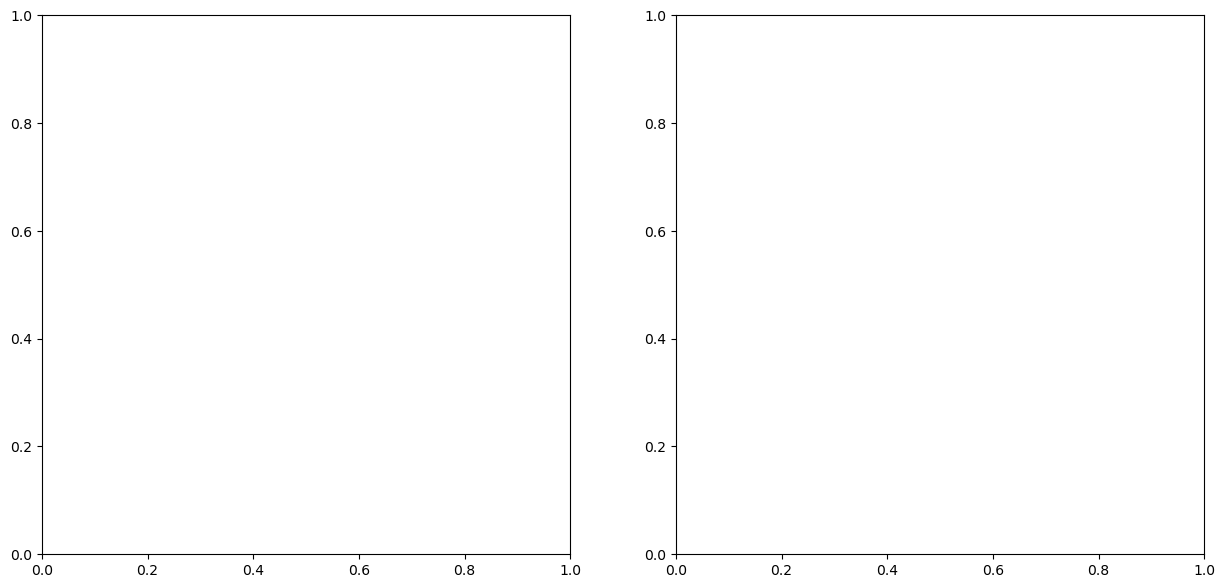

In [83]:
# Creating a Pclass list for labelling
Pclasses=["1st", "2nd", "3rd"]

# Instantiate a figure of size of 15 x 7 inches with 2 subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

# Creating a countplot of Pclass concerning Sex in the first subplot
sns.countplot(x='Pclass', data=data, hue='Sex', palette='Dark2', ax=ax[0])

# Adding percentages to the bars
for p in ax[0].patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax[0].annotate(percentage, (x, y))


# Adding some cosmetics - ticks, labels, title, legend and grid to the countplot.
ax[0].set_title(label='Pclass vs Sex', size=16)
ax[0].set_ylabel(ylabel='Number of Passengers', size=14)
ax[0].set_xlabel(xlabel='Class', size=14)
ax[0].set_xticklabels(labels=Pclasses, fontsize=12)
ax[0].set_yticklabels(labels=np.arange(0,400,50), fontsize=12)
ax[0].legend(labels=["Male", 'Female'])
ax[0].grid(True)


# Creating a pointplot of embarked concerning survival in the second subplot
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data, palette='muted', ax=ax[1])

# Adding some cosmetics - ticks, labels, title, and grid to the pointplot.
ax[1].set_title(label='Pclass vs Sex', size=16)
ax[1].set_ylabel(ylabel="Passengers' Survival", size=14)
ax[1].set_xlabel(xlabel='Class', size=14)
ax[1].set_xticklabels(labels=Pclasses, fontsize=12)
ax[1].set_yticklabels(labels=np.round(a=np.arange(0.0, 1.2, 0.20), decimals=2), fontsize=12)
ax[1].grid(True)

# Setting a super title for the Age_band concerning survival plots
plt.suptitle(t='Influence of Sex and Pclass on Survival', size=16, y=1.0)

# Display the figures
plt.show()

### **Observations**:

- From both the graph, **Men** from **Pclass=3** had a **very low** survival rate as compared to the rest of the classes.

- From the right graph, It is evident that **irrespective** of **Pclass**, **Women** were given **first priority** while rescue.

<a name = Section812></a>
# **8.12 What is the rate of survival of males and females on the basis of Port of Embarkment?**

ValueError: Could not interpret input 'Embarked'

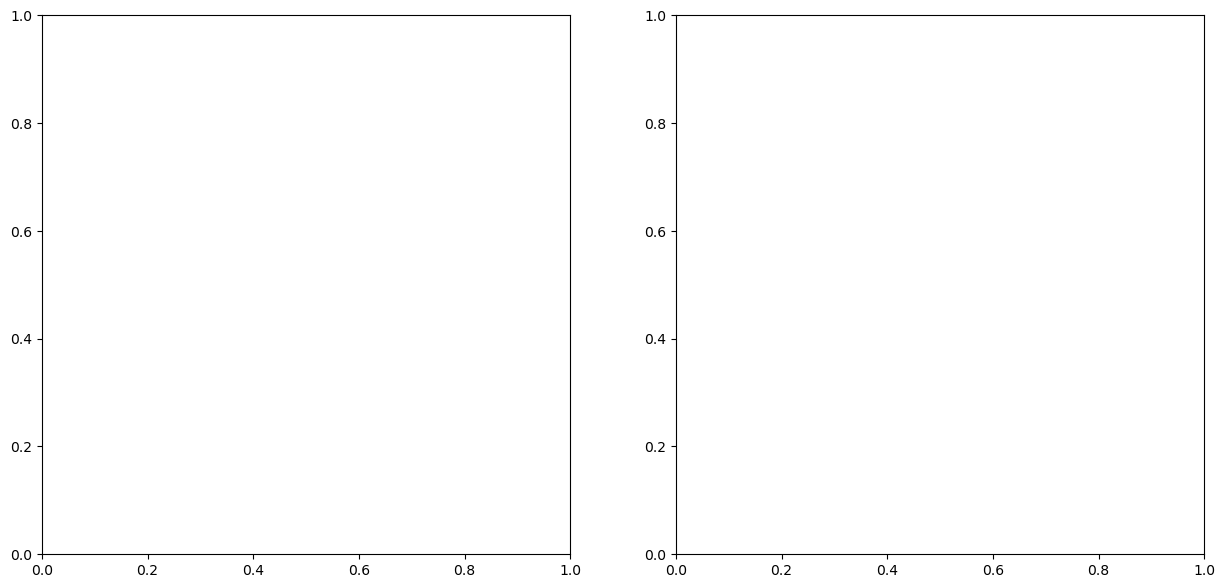

In [84]:
# Instantiate a figure of size of 15 x 7 inches with 2 subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

# Creating a countplot of embarked concerning sex in the first subplot
sns.countplot(x='Embarked', data=data, hue='Sex', palette='rocket', ax=ax[0])

# Adding percentages to the bars
for p in ax[0].patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax[0].annotate(percentage, (x, y))


# Adding some cosmetics - ticks, labels, title, legend and grid to the countplot.
ax[0].set_title(label='Frequency Distribution for Embarked vs Sex', size=16)
ax[0].set_ylabel(ylabel='Count', size=14)
ax[0].set_xlabel(xlabel='Port of Embarkment', size=14)
ax[0].set_xticklabels(labels=ports, fontsize=12)
ax[0].set_yticklabels(labels=np.arange(0, 500, 100), fontsize=12)
ax[0].legend(labels=["Male", 'Female'])
ax[0].grid(True)

# Creating a barplot of embarked concerning survival and sex in the second subplot
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=data, palette='Set2', ax=ax[1])

# Adding some cosmetics - ticks, labels, title, and grid to the barplot.
ax[1].set_title(label='Embarked vs Survival vs Sex Comparison', size=16)
ax[1].set_ylabel(ylabel='Survived', size=14)
ax[1].set_xlabel(xlabel='Port of Embarkment', size=14)
ax[1].set_xticklabels(labels=ports, fontsize=12)
ax[1].set_yticklabels(labels=np.round(a=np.arange(0, 1, 0.2), decimals=2), fontsize=12)
ax[1].grid(True)

# Setting a super title for the Age_band concerning survival plots
plt.suptitle(t='Influence of Sex and Port of Embarkment on Survival', size=16, y=1.0)

# Display the outputs
plt.show()

### **Observations**: #Changes with stats data/comparison

- From the left graph, we see that number of **males** boarding from **Southampton** is **twice** the number of **females** boarding from the same port.

- On observing both the graphs, we see that a significant number of **women** have **survived** as **compared** to **men** from **Southampton**.

- Number of **men** is **highest** from **Southampton** port yet the **rate** of **survival** is **low** for them as seen from the right graph.

- **Chances** of survival of **passengers** who boarded from **Cherbourg** is **highest**.

- **Chances** of survival of **males** boarding from **Queenstown** is **less than 10%**.

<a name = Section813></a>
# **8.13 How do Pclass, Age, Sex, and Embarked collectively affect the survivability of the passengers?**

ValueError: Could not interpret input 'Pclass'

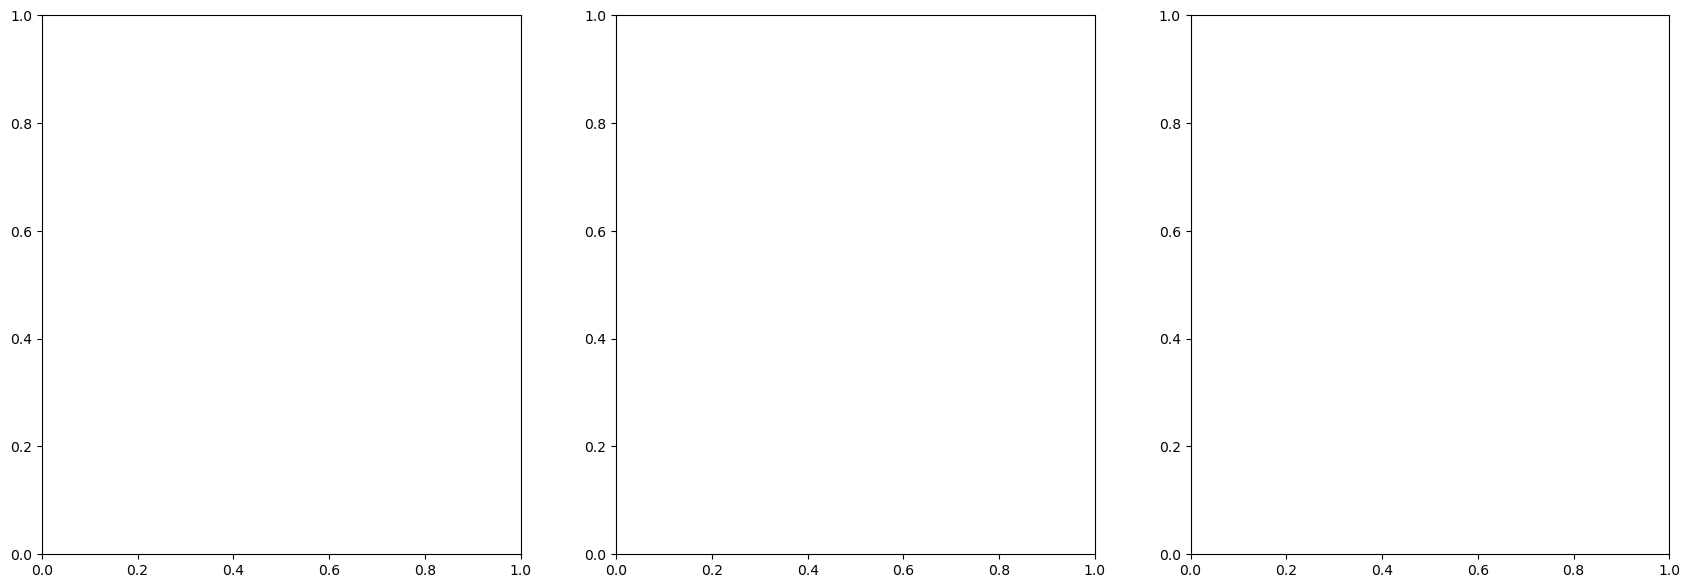

In [85]:
# Instantiate a figure of size of 21 x 7 inches with 3 subplots
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(21,7))

# Creating violinplot between Pclass, Age and Survived
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0], palette='rocket')

# Adding some cosmetics - ticks, labels, title, and grid to the first violonplot.
ax[0].set_title(label='Pclass and Age vs Survived', size=16)
ax[0].set_ylabel(ylabel='Age', size=14)
ax[0].set_xlabel(xlabel='Pclass', size=14)
ax[0].set_xticklabels(labels=Pclasses, fontsize=12)
ax[0].set_yticklabels(labels=np.arange(-20, 100, 20), fontsize=12)
ax[0].grid(True)

# Creating violinplot between Sex, Age and Survived
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1], palette='hls')

# Adding some cosmetics - ticks, labels, title, and grid to the second violonplot.
ax[1].set_title(label='Sex and Age vs Survived', size=16)
ax[1].set_ylabel(ylabel='Age', size=14)
ax[1].set_xlabel(xlabel='Sex', size=14)
ax[1].set_xticklabels(labels=["Male", "Female"], fontsize=12)
ax[1].set_yticklabels(labels=np.arange(-20, 100, 20), fontsize=12)
ax[1].grid(True)

# Creating violinplot between Embarked, Age and Survived
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=data, split=True, ax=ax[2], palette='Dark2')

# Adding some cosmetics - ticks, labels, title, and grid to the third violonplot.
ax[2].set_title(label='Embarked and Age vs Survived', size=16)
ax[2].set_ylabel(ylabel='Age', size=14)
ax[2].set_xlabel(xlabel='Port of Embarkment', size=14)
ax[2].set_xticklabels(labels=ports, fontsize=12)
ax[2].set_yticklabels(labels=np.arange(-20, 100, 20), fontsize=12)
ax[2].grid(True)

# Setting a super title for the Survival concerning Age, Pclass, Sex and Embarked
plt.suptitle(t='Influence of Pclass, Age, Gender and Embarked on Survival', size=16, y=1.0)

# Display the figures
plt.show()

### **Observations**:

- From the left graph, we see that the **survival** rate for passenegers below **Age 10 years** looks good irrespective of the **Pclass**.

- For **males**, as shown in the middle graph, the **survival** chances **decrease** with an **increase** in **age**.

- There are rarely any children from **Queenstown** who boarded the ship as seen from the right graph.

- Survival of passengers who boarded from **Queenstown** seems to be decent for ages **20-40** years.

<a name = Section814></a>
# **8.14 How do Pclass, Embarked, and Sex influence the Survival of passengers.**


ValueError: Could not interpret input 'Pclass'

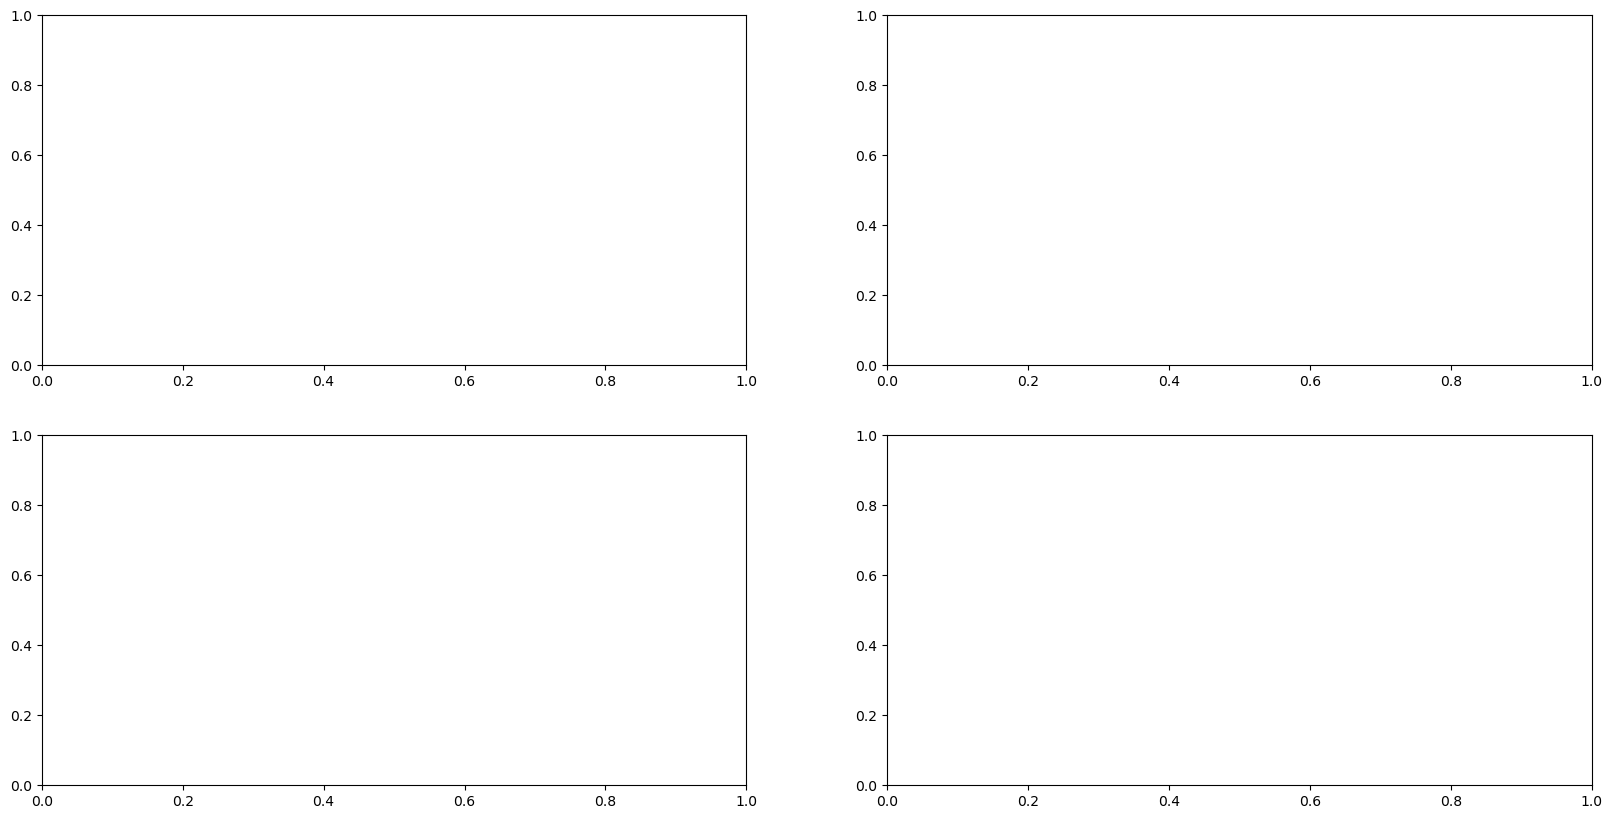

In [86]:
# Instantiate a figure of size of 20 x 10 inches with 4 subplots
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

# Creating a countplot of embarked concerning pclass in the first subplot
sns.countplot(x='Pclass', hue='Embarked', data=data, palette='bright', ax=ax[0, 0])

# Adding percentages to the bars
for p in ax[0, 0].patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax[0, 0].annotate(percentage, (x, y))

# Adding some cosmetics - ticks, labels, title, legend and grid.
ax[0, 0].set_title(label='Pclass concerning Embarked', size=16)
ax[0, 0].set_ylabel(ylabel='Count', size=14)
ax[0, 0].set_xlabel(xlabel='Pclass', size=14)
ax[0, 0].set_xticklabels(labels=Pclasses, fontsize=12)
ax[0, 0].set_yticklabels(labels=np.arange(0, 400, 50), fontsize=12)
ax[0, 0].legend(labels=ports)
ax[0, 0].grid(True)

# Creating a pointplot of pclass and sex concerning survival for Southampton port
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data[data['Embarked']=='S'], ax=ax[0, 1])

# Adding some cosmetics - ticks, labels, title, legend and grid.
ax[0, 1].set_title(label='Pclass concerning Gender and Survival at Southampton', size=16)
ax[0, 1].set_ylabel(ylabel='Survived', size=14)
ax[0, 1].set_xlabel(xlabel='Pclass', size=14)
ax[0, 1].set_xticklabels(labels=Pclasses, fontsize=12)
ax[0, 1].set_yticklabels(labels=np.round(a=np.arange(0, 1.2, 0.2), decimals=2), fontsize=12)
ax[0, 1].grid(True)

# Creating a pointplot of pclass and sex concerning survival for Cherbourg port
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data[data['Embarked']=='C'], ax=ax[1, 0])

# Adding some cosmetics - ticks, labels, title, legend and grid.
ax[1, 0].set_title(label='Pclass concerning Gender and Survival at Cherbourg', size=16)
ax[1, 0].set_ylabel(ylabel='Survived', size=14)
ax[1, 0].set_xlabel(xlabel='Pclass', size=14)
ax[1, 0].set_xticklabels(labels=Pclasses, fontsize=12)
ax[1, 0].set_yticklabels(labels=np.round(a=np.arange(-0.2, 1.2, 0.2), decimals=2), fontsize=12)
ax[1, 0].grid(True)

# Creating a pointplot of pclass and sex concerning survival for Queenstown port
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=data[data['Embarked']=='Q'], ax=ax[1, 1])

# Adding some cosmetics - ticks, labels, title, legend and grid.
ax[1, 1].set_title(label='Pclass concerning Gender and Survival at Queenstown', size=16)
ax[1, 1].set_ylabel(ylabel='Survived', size=14)
ax[1, 1].set_xlabel(xlabel='Pclass', size=14)
ax[1, 1].set_xticklabels(labels=Pclasses, fontsize=12)
ax[1, 1].set_yticklabels(labels=np.round(a=np.arange(-0.2, 1.2, 0.2), decimals=2), fontsize=12)
ax[1, 1].grid(True)

# Setting a super title
plt.suptitle(t='Pclass and Survival Concerning Embarked and Sex', size=18, y=1.03)

# Set tight layout to avoid overlap of plots and labels
plt.tight_layout()

### **Observations**:

- From the first plot, we observe that the **maximum** number of passenegers boarded from **Southampton** where a **majority** of them were from **Pclass=3**.

- On observing the upper two plots, port **Southampton** looks to be very **unlucky** for **Pclass=3** Passenegers as the **survival** rate (around 81% died) for both men and women is **very low**.

- Port **Queenstown** had almost **95%** of the passengers from **Pclass=3** as observed from top-left and bottom-right plots.

- Port **Queenstown** (bottom-right) looks looks to be **unluckiest** for **Men**, as almost all were from **Pclass=3** and **majority** of them **died**.

- On looking at all three plots concerning gender, we see that the **survival** chances are **highest** for **women** for **Pclass=1** and **Pclass=2**.

- The **Passengers** from **Cherbourg** (bottom-left plot) look to be **lucky** as a good proportion of them survived. The reason for this maybe the **rescue** of almost all the **Pclass=1** and **Pclass=2** Passengers.

## **Hypothesis**: Women and children are more likely to survive.

- On studying the previous questions, we observe that an **overwhelming** percentage of **women** & **children** have **survived** the titanic disaster.

- This reminds us of the infamous line from the Titanic movie - ***Women and Children first.***

- But we should also take note that there were a **significant amount** of **men** present during the voyage.

- **76%** of **females** **survived** whereas only **16%** of males **survived**.

- Also the **survival** rate for a **male** is **very low** **irrespective** of the **class**.

- Almost **all women in Pclass 1 and Pclass 2 survived** and nearly **all men in Pclass 2 and Pclass 3 died**.

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- We have seen the **impact** of various factors such as **Gender**, **Age**, **Port of Embarkment**, **FamilySize** on the **rate of survival**.

- **Women** have a **higher** chances of **survival** than men.

- Passengers from **20-40 years** of age had a **very low survival** rate.

- But since a lot of **Age** data was **missing**, we **can't conclude** how much impact Age really had on survival.

- The **class** of the **passenger** seems to have played an **important** role in the rescue operation.

- Passengers who were from the **1st class** were given **more priority** during the **rescue** than **rest** of the **passengers**.

- Passengers who boarded from the **Cherbourg** port had a **higher survival** rate in contrast to the other two ports.

- A lot of **3rd class passengers** from the **Southampton** port **died** in the accident.

<a name = Section92></a>
### **9.2 Actionable Insights**

- **More** number of **life-boats** and **life-jackets** should be available to **ensure passengers rescue**.

- Passengers from **higher** classes should also **help others** during the time of **crisis**.

- **Disabled** passengers should be given **more priority** during the rescue.

- There should be **more professional crew members** to escort passengers during such emergencies.

- **Passengers** can be **trained** for **emergency** evacuations during or before the voyage to better co-ordinate with and help the crew on-board.

- **Tools** such as flares, search lights, radar should be **made available** adequately.